In [1]:
flow1 = {u'fillp_sheep': {'valid_runs': 3, 'name': 'FillP-Sheep', 1: {'delay': [33.68, 31.924, 40.642], 'loss': [10.27, 11.65, 11.11], 'tput': [155.96, 208.46, 224.25]}}, u'fillp': {'valid_runs': 3, 'name': 'FillP', 1: {'delay': [32.573, 41.385, 32.533], 'loss': [17.89, 16.45, 12.17], 'tput': [196.22, 158.9, 170.13]}}, u'cubic': {'valid_runs': 3, 'name': 'TCP Cubic', 1: {'delay': [32.175, 32.573, 31.06], 'loss': [0.29, 0.57, 0.15], 'tput': [13.76, 12.97, 14.91]}}, u'sprout': {'valid_runs': 3, 'name': 'Sprout', 1: {'delay': [32.866, 31.527, 39.644], 'loss': [1.48, 0.74, 4.07], 'tput': [11.54, 11.55, 9.0]}}, u'vivace': {'valid_runs': 3, 'name': 'PCC-Vivace', 1: {'delay': [31.154, 41.275, 38.813], 'loss': [0.75, 1.19, 0.76], 'tput': [73.25, 83.44, 204.4]}}, u'scream': {'valid_runs': 3, 'name': 'SCReAM', 1: {'delay': [31.425, 31.934, 30.29], 'loss': [0.0, 0.0, 0.0], 'tput': [0.21, 0.21, 0.21]}}, u'vegas': {'valid_runs': 3, 'name': 'TCP Vegas', 1: {'delay': [33.11, 32.022, 32.033], 'loss': [0.62, 0.6, 0.34], 'tput': [10.45, 10.72, 12.62]}}, u'taova': {'valid_runs': 3, 'name': 'TaoVA-100x', 1: {'delay': [40.601, 31.409, 31.57], 'loss': [6.48, 4.52, 5.0], 'tput': [121.38, 127.48, 131.14]}}, u'pcc': {'valid_runs': 3, 'name': 'PCC-Allegro', 1: {'delay': [40.578, 31.388, 31.221], 'loss': [17.54, 6.76, 1.81], 'tput': [237.22, 280.15, 109.54]}}, u'bbr': {'valid_runs': 3, 'name': 'TCP BBR', 1: {'delay': [39.789, 32.362, 31.56], 'loss': [6.91, 6.53, 4.74], 'tput': [141.59, 138.73, 156.44]}}, u'ledbat': {'valid_runs': 3, 'name': 'LEDBAT', 1: {'delay': [40.593, 32.12, 31.108], 'loss': [0.92, 0.87, 0.64], 'tput': [7.16, 10.61, 11.22]}}, u'pcc_experimental': {'valid_runs': 3, 'name': 'PCC-Expr', 1: {'delay': [32.635, 39.897, 39.664], 'loss': [6.49, 2.23, 4.56], 'tput': [127.46, 188.32, 125.43]}}}

In [3]:
flow1['fillp']

{'valid_runs': 3,
 'name': 'FillP',
 1: {'delay': [32.573, 41.385, 32.533],
  'loss': [17.89, 16.45, 12.17],
  'tput': [196.22, 158.9, 170.13]}}

In [4]:
import numpy as np
import pandas as pd

In [18]:
data = pd.DataFrame()

In [25]:
def process_data(flow_data, suffix,num_flow):
    mean_tput = []
    mean_loss = []
    mean_delay = []
    std_tput = []
    std_loss = []
    std_delay = []
    for cc in sorted(flow_data.keys()):
        tput = [np.mean(flow_data[cc][i]['tput']) for i in range(1,num_flow+1)]
        loss = [np.mean(flow_data[cc][i]['loss']) for i in range(1, num_flow+1)]
        delay = [np.mean(flow_data[cc][i]['delay']) for i in range(1, num_flow+1)]
        mean_tput.append(np.mean(tput))
        mean_loss.append(np.mean(loss))
        mean_delay.append(np.mean(delay))
        std_tput.append(np.std(tput))
        std_loss.append(np.std(loss))
        std_delay.append(np.std(delay))
    data['mean_tput_'+suffix] = mean_tput
    data['std_tput_'+suffix] = std_tput
    data['mean_loss_'+suffix] = mean_loss
    data['std_loss_'+suffix] = std_loss
    data['mean_95%tile_delay_'+suffix] = mean_delay
    data['std_95%tile_delay_'+suffix] = std_delay

In [27]:
process_data(flow1,'flow1',1)

In [64]:
data.index = sorted(flow1.keys())

In [65]:
flow5 = {u'fillp_sheep': {1: {'delay': [39.425, 40.581, 43.656], 'loss': [19.14, 17.44, 23.28], 'tput': [35.61, 33.96, 31.2]}, 2: {'delay': [35.708, 46.454, 44.402], 'loss': [18.54, 17.57, 21.8], 'tput': [27.43, 26.41, 24.93]}, 3: {'delay': [37.766, 46.723, 44.263], 'loss': [20.14, 16.4, 23.46], 'tput': [34.94, 25.0, 31.96]}, 4: {'delay': [50.005, 49.879, 39.797], 'loss': [21.05, 20.83, 19.06], 'tput': [33.51, 35.29, 25.64]}, 'name': 'FillP-Sheep', 'valid_runs': 3, 5: {'delay': [35.06, 41.049, 46.236], 'loss': [17.77, 18.99, 19.48], 'tput': [26.6, 31.04, 31.19]}}, u'fillp': {1: {'delay': [47.44, 47.352, 50.162], 'loss': [36.36, 39.22, 36.55], 'tput': [27.73, 28.28, 24.74]}, 2: {'delay': [48.275, 49.13, 57.162], 'loss': [40.24, 28.18, 36.55], 'tput': [38.88, 41.49, 33.46]}, 3: {'delay': [49.867, 54.439, 48.365], 'loss': [31.96, 37.62, 35.17], 'tput': [43.14, 29.54, 24.72]}, 4: {'delay': [48.964, 54.194, 49.177], 'loss': [34.74, 36.86, 35.58], 'tput': [37.18, 38.66, 23.82]}, 'name': 'FillP', 'valid_runs': 3, 5: {'delay': [47.075, 48.283, 56.086], 'loss': [39.21, 38.36, 34.58], 'tput': [29.48, 36.52, 49.58]}}, u'cubic': {1: {'delay': [31.767, 33.32, 39.907], 'loss': [0.29, 0.29, 0.59], 'tput': [23.85, 17.59, 18.33]}, 2: {'delay': [39.828, 33.287, 32.11], 'loss': [0.45, 0.49, 0.57], 'tput': [25.24, 18.55, 14.4]}, 3: {'delay': [40.61, 41.694, 33.661], 'loss': [0.16, 0.38, 0.45], 'tput': [23.41, 16.21, 16.03]}, 4: {'delay': [31.811, 33.253, 40.878], 'loss': [0.34, 0.38, 0.77], 'tput': [21.97, 16.42, 16.76]}, 'name': 'TCP Cubic', 'valid_runs': 3, 5: {'delay': [30.784, 33.404, 32.65], 'loss': [0.36, 0.47, 0.46], 'tput': [32.11, 17.49, 14.82]}}, u'sprout': {1: {'delay': [39.459, 40.344, 40.377], 'loss': [3.09, 0.7, 1.73], 'tput': [8.97, 11.42, 9.19]}, 2: {'delay': [32.461, 39.617, 31.805], 'loss': [0.85, 3.74, 1.31], 'tput': [11.22, 9.02, 11.52]}, 3: {'delay': [40.015, 32.599, 32.333], 'loss': [2.46, 0.98, 0.38], 'tput': [9.17, 11.36, 11.31]}, 4: {'delay': [32.387, 32.795, 32.331], 'loss': [1.06, 0.91, 0.8], 'tput': [11.58, 11.62, 11.33]}, 'name': 'Sprout', 'valid_runs': 3, 5: {'delay': [31.693, 32.212, 31.791], 'loss': [1.1, 0.79, 0.7], 'tput': [11.4, 11.24, 11.62]}}, u'vivace': {1: {'delay': [31.167, 39.715, 30.557], 'loss': [0.0, 0.06, 0.01], 'tput': [11.97, 19.58, 30.74]}, 2: {'delay': [40.053, 31.757, 31.428], 'loss': [1.98, 0.0, 0.0], 'tput': [55.51, 19.25, 9.6]}, 3: {'delay': [31.465, 31.005, 32.28], 'loss': [0.0, 0.08, 1.83], 'tput': [9.92, 21.03, 60.69]}, 4: {'delay': [40.738, 31.797, 39.423], 'loss': [0.66, 0.0, 0.06], 'tput': [56.81, 13.03, 9.42]}, 'name': 'PCC-Vivace', 'valid_runs': 3, 5: {'delay': [33.21, 31.578, 32.279], 'loss': [2.29, 0.03, 0.95], 'tput': [57.89, 33.5, 59.44]}}, u'scream': {1: {'delay': [32.183, 39.898, 32.357], 'loss': [0.0, 0.0, 0.0], 'tput': [0.22, 0.22, 0.22]}, 2: {'delay': [39.566, 31.587, 32.004], 'loss': [0.0, 0.0, 0.0], 'tput': [0.22, 0.22, 0.22]}, 3: {'delay': [31.265, 38.946, 39.412], 'loss': [0.0, 0.0, 0.0], 'tput': [0.22, 0.22, 0.22]}, 4: {'delay': [32.486, 32.288, 32.472], 'loss': [0.0, 0.0, 0.0], 'tput': [0.21, 0.21, 0.21]}, 'name': 'SCReAM', 'valid_runs': 3, 5: {'delay': [32.329, 32.313, 39.791], 'loss': [0.0, 0.0, 0.0], 'tput': [0.21, 0.21, 0.22]}}, u'vegas': {1: {'delay': [32.601, 33.001, 32.588], 'loss': [0.43, 0.21, 0.34], 'tput': [14.62, 13.06, 13.83]}, 2: {'delay': [39.901, 40.965, 40.181], 'loss': [0.95, 0.45, 0.29], 'tput': [13.27, 15.09, 12.17]}, 3: {'delay': [33.257, 33.342, 31.871], 'loss': [0.21, 0.4, 0.28], 'tput': [16.15, 15.76, 15.9]}, 4: {'delay': [33.254, 32.711, 32.108], 'loss': [0.25, 0.77, 0.61], 'tput': [14.39, 15.51, 13.05]}, 'name': 'TCP Vegas', 'valid_runs': 3, 5: {'delay': [41.376, 32.338, 40.261], 'loss': [0.37, 0.5, 0.48], 'tput': [13.99, 14.04, 13.2]}}, u'taova': {1: {'delay': [38.775, 35.926, 46.096], 'loss': [19.56, 24.56, 24.52], 'tput': [40.35, 39.21, 35.92]}, 2: {'delay': [35.39, 36.564, 46.352], 'loss': [25.27, 23.03, 23.28], 'tput': [43.15, 38.0, 35.28]}, 3: {'delay': [38.62, 38.142, 38.349], 'loss': [18.59, 22.65, 23.17], 'tput': [40.72, 38.57, 34.38]}, 4: {'delay': [36.693, 45.125, 47.253], 'loss': [20.76, 26.39, 24.98], 'tput': [39.74, 36.98, 34.92]}, 'name': 'TaoVA-100x', 'valid_runs': 3, 5: {'delay': [38.165, 35.801, 37.413], 'loss': [18.03, 24.97, 26.24], 'tput': [40.32, 38.57, 36.72]}}, u'pcc': {1: {'delay': [31.144, 31.989, 39.211], 'loss': [0.16, 0.81, 0.0], 'tput': [45.74, 44.47, 4.44]}, 2: {'delay': [31.64, 39.874, 40.307], 'loss': [0.12, 1.5, 2.26], 'tput': [44.92, 67.66, 74.53]}, 3: {'delay': [31.186, 30.755, 40.22], 'loss': [0.43, 0.0, 1.74], 'tput': [37.96, 9.01, 81.66]}, 4: {'delay': [31.975, 39.115, 39.535], 'loss': [0.46, 1.46, 3.04], 'tput': [37.62, 46.01, 79.73]}, 'name': 'PCC-Allegro', 'valid_runs': 3, 5: {'delay': [31.871, 40.44, 31.809], 'loss': [0.06, 2.85, 0.49], 'tput': [18.97, 71.91, 65.42]}}, u'bbr': {1: {'delay': [34.5, 34.983, 34.314], 'loss': [7.76, 12.65, 9.82], 'tput': [118.47, 109.41, 95.14]}, 2: {'delay': [42.513, 34.232, 34.832], 'loss': [6.78, 7.39, 9.81], 'tput': [116.51, 113.58, 99.3]}, 3: {'delay': [34.29, 34.149, 42.362], 'loss': [9.75, 8.42, 10.2], 'tput': [110.15, 116.37, 93.18]}, 4: {'delay': [42.233, 34.847, 33.153], 'loss': [9.05, 9.39, 8.14], 'tput': [107.31, 102.49, 117.85]}, 'name': 'TCP BBR', 'valid_runs': 3, 5: {'delay': [34.897, 42.256, 35.254], 'loss': [8.62, 9.85, 9.13], 'tput': [108.68, 103.48, 97.0]}}, u'ledbat': {1: {'delay': [32.47, 32.648, 33.2], 'loss': [0.53, 0.48, 0.64], 'tput': [16.55, 11.41, 11.08]}, 2: {'delay': [40.25, 40.991, 40.921], 'loss': [0.7, 0.69, 0.59], 'tput': [12.06, 8.36, 10.7]}, 3: {'delay': [32.583, 41.991, 40.784], 'loss': [0.49, 0.92, 0.71], 'tput': [14.58, 8.14, 9.37]}, 4: {'delay': [32.186, 33.409, 40.52], 'loss': [0.2, 0.72, 0.65], 'tput': [24.04, 11.04, 11.77]}, 'name': 'LEDBAT', 'valid_runs': 3, 5: {'delay': [32.225, 41.42, 40.101], 'loss': [0.28, 0.89, 0.72], 'tput': [22.02, 7.64, 9.21]}}, u'pcc_experimental': {1: {'delay': [37.858, 46.936, 39.667], 'loss': [7.34, 14.46, 19.75], 'tput': [34.22, 34.5, 36.74]}, 2: {'delay': [38.965, 37.041, 46.0], 'loss': [13.17, 0.0, 8.39], 'tput': [36.67, 4.65, 35.87]}, 3: {'delay': [32.449, 39.286, 33.804], 'loss': [0.0, 25.17, 0.0], 'tput': [1.79, 42.1, 5.26]}, 4: {'delay': [37.766, 36.575, 47.881], 'loss': [17.25, 12.06, 24.95], 'tput': [35.35, 35.15, 37.95]}, 'name': 'PCC-Expr', 'valid_runs': 3, 5: {'delay': [35.756, 39.272, 47.703], 'loss': [4.94, 28.65, 21.29], 'tput': [32.58, 41.59, 36.26]}}}

In [66]:
flow10 = {u'fillp_sheep': {1: {'delay': [28.363, 28.617, 48.618], 'loss': [16.97, 17.58, 21.92], 'tput': [13.88, 13.29, 10.69]}, 2: {'delay': [45.095, 53.644, 33.17], 'loss': [11.56, 16.17, 12.25], 'tput': [13.27, 13.73, 11.64]}, 3: {'delay': [49.225, 37.146, 38.308], 'loss': [15.49, 19.52, 21.8], 'tput': [13.99, 12.54, 12.78]}, 4: {'delay': [27.745, 50.784, 36.571], 'loss': [16.98, 17.26, 19.47], 'tput': [13.05, 10.72, 11.29]}, 'name': 'FillP-Sheep', 6: {'delay': [43.247, 45.282, 28.796], 'loss': [14.62, 16.34, 19.94], 'tput': [14.11, 13.9, 12.9]}, 7: {'delay': [39.828, 59.745, 31.966], 'loss': [7.22, 17.84, 11.9], 'tput': [14.08, 13.37, 11.44]}, 8: {'delay': [45.091, 36.376, 55.548], 'loss': [14.49, 17.69, 21.3], 'tput': [15.04, 13.03, 12.0]}, 9: {'delay': [28.458, 30.517, 52.828], 'loss': [15.71, 7.85, 19.06], 'tput': [13.99, 13.09, 11.85]}, 10: {'delay': [29.57, 47.624, 28.591], 'loss': [20.23, 13.41, 17.06], 'tput': [12.51, 11.52, 13.65]}, 'valid_runs': 3, 5: {'delay': [32.925, 43.597, 42.056], 'loss': [12.16, 19.49, 13.06], 'tput': [15.35, 12.54, 9.38]}}, u'fillp': {1: {'delay': [105.389, 106.081, 99.61], 'loss': [32.52, 41.93, 42.41], 'tput': [7.6, 9.69, 9.36]}, 2: {'delay': [88.159, 30.841, 76.947], 'loss': [22.59, 16.92, 25.92], 'tput': [7.82, 9.97, 11.02]}, 3: {'delay': [74.296, 103.892, 28.158], 'loss': [33.53, 37.58, 15.79], 'tput': [8.9, 10.35, 9.51]}, 4: {'delay': [51.311, 37.171, 33.055], 'loss': [29.85, 19.57, 10.78], 'tput': [17.87, 12.17, 9.6]}, 'name': 'FillP', 6: {'delay': [99.561, 36.602, 36.222], 'loss': [33.58, 23.82, 28.78], 'tput': [8.81, 12.71, 12.79]}, 7: {'delay': [113.527, 109.341, 111.962], 'loss': [34.92, 47.79, 43.19], 'tput': [8.45, 9.52, 9.13]}, 8: {'delay': [80.813, 42.859, 118.803], 'loss': [35.47, 21.09, 42.47], 'tput': [16.32, 9.46, 9.52]}, 9: {'delay': [95.833, 107.39, 104.925], 'loss': [38.15, 43.85, 39.49], 'tput': [8.7, 7.82, 9.79]}, 10: {'delay': [55.606, 29.001, 113.839], 'loss': [27.27, 16.06, 41.67], 'tput': [14.95, 10.19, 8.26]}, 'valid_runs': 3, 5: {'delay': [120.075, 103.59, 47.957], 'loss': [38.19, 44.23, 21.92], 'tput': [8.75, 10.14, 9.77]}}, u'cubic': {1: {'delay': [38.511, 29.435, 27.547], 'loss': [0.87, 0.8, 0.55], 'tput': [15.89, 14.06, 20.3]}, 2: {'delay': [29.578, 28.789, 27.349], 'loss': [1.15, 0.46, 0.33], 'tput': [15.8, 15.25, 18.66]}, 3: {'delay': [29.155, 28.392, 35.876], 'loss': [0.75, 0.29, 0.28], 'tput': [15.82, 15.39, 19.49]}, 4: {'delay': [29.629, 29.355, 35.152], 'loss': [0.56, 0.24, 0.14], 'tput': [17.57, 14.98, 21.04]}, 'name': 'TCP Cubic', 6: {'delay': [36.958, 36.034, 27.815], 'loss': [0.37, 0.37, 0.26], 'tput': [15.16, 14.2, 20.29]}, 7: {'delay': [29.594, 36.25, 27.481], 'loss': [0.41, 0.42, 0.35], 'tput': [13.82, 15.63, 21.56]}, 8: {'delay': [29.973, 28.935, 35.746], 'loss': [1.31, 0.44, 0.21], 'tput': [16.17, 16.41, 24.6]}, 9: {'delay': [29.024, 29.673, 27.965], 'loss': [0.62, 0.39, 0.38], 'tput': [16.32, 16.09, 19.43]}, 10: {'delay': [28.699, 28.461, 34.292], 'loss': [0.36, 0.54, 0.25], 'tput': [15.85, 16.4, 17.6]}, 'valid_runs': 3, 5: {'delay': [30.549, 37.115, 36.151], 'loss': [0.55, 0.32, 0.2], 'tput': [13.62, 13.27, 19.01]}}, u'sprout': {1: {'delay': [27.842, 36.091, 27.176], 'loss': [0.63, 2.28, 0.57], 'tput': [10.89, 8.61, 10.83]}, 2: {'delay': [27.331, 26.885, 27.573], 'loss': [1.42, 0.65, 0.85], 'tput': [11.38, 10.4, 11.03]}, 3: {'delay': [35.636, 34.565, 26.788], 'loss': [1.1, 1.37, 1.78], 'tput': [11.1, 10.78, 11.09]}, 4: {'delay': [27.058, 28.027, 27.005], 'loss': [0.77, 1.44, 0.97], 'tput': [11.29, 10.68, 10.87]}, 'name': 'Sprout', 6: {'delay': [27.228, 27.862, 27.476], 'loss': [1.19, 1.24, 1.4], 'tput': [11.39, 11.08, 11.4]}, 7: {'delay': [27.694, 26.877, 35.141], 'loss': [1.22, 0.95, 1.73], 'tput': [11.3, 10.82, 8.95]}, 8: {'delay': [28.037, 36.63, 26.619], 'loss': [0.55, 1.44, 1.37], 'tput': [10.78, 10.83, 11.04]}, 9: {'delay': [26.987, 35.625, 35.755], 'loss': [1.21, 0.86, 0.65], 'tput': [11.55, 10.59, 10.92]}, 10: {'delay': [27.446, 27.241, 26.693], 'loss': [1.65, 1.33, 0.71], 'tput': [11.29, 10.82, 10.94]}, 'valid_runs': 3, 5: {'delay': [36.378, 27.205, 35.729], 'loss': [2.77, 1.44, 0.99], 'tput': [8.78, 11.01, 11.11]}}, u'vivace': {1: {'delay': [25.873, 29.197, 25.811], 'loss': [0.25, 3.34, 0.07], 'tput': [11.95, 27.47, 17.24]}, 2: {'delay': [26.52, 29.768, 26.665], 'loss': [0.04, 2.31, 0.0], 'tput': [12.41, 19.72, 6.49]}, 3: {'delay': [26.271, 34.38, 27.841], 'loss': [0.0, 0.08, 0.48], 'tput': [0.03, 12.64, 29.29]}, 4: {'delay': [26.661, 27.944, 26.983], 'loss': [0.01, 1.5, 0.5], 'tput': [27.54, 16.52, 29.41]}, 'name': 'PCC-Vivace', 6: {'delay': [34.629, 27.586, 33.774], 'loss': [0.1, 0.03, 0.03], 'tput': [12.84, 11.12, 20.56]}, 7: {'delay': [26.134, 31.052, 27.118], 'loss': [1.34, 2.21, 0.0], 'tput': [22.21, 19.3, 0.03]}, 8: {'delay': [26.709, 28.063, 34.691], 'loss': [0.0, 0.0, 0.0], 'tput': [0.02, 0.02, 0.02]}, 9: {'delay': [26.556, 37.781, 27.068], 'loss': [1.4, 2.19, 0.58], 'tput': [19.5, 19.57, 29.25]}, 10: {'delay': [33.716, 29.448, 26.659], 'loss': [0.11, 0.0, 0.0], 'tput': [26.5, 0.02, 4.37]}, 'valid_runs': 3, 5: {'delay': [26.48, 31.529, 26.733], 'loss': [0.04, 2.51, 0.24], 'tput': [10.18, 21.73, 28.57]}}, u'scream': {1: {'delay': [35.422, 27.46, 29.658], 'loss': [0.0, 0.0, 0.0], 'tput': [0.22, 0.21, 0.22]}, 2: {'delay': [35.384, 27.208, 29.386], 'loss': [0.0, 0.0, 0.0], 'tput': [0.22, 0.21, 0.21]}, 3: {'delay': [27.294, 27.662, 29.269], 'loss': [0.0, 0.0, 0.0], 'tput': [0.22, 0.22, 0.21]}, 4: {'delay': [27.216, 35.381, 29.7], 'loss': [0.0, 0.0, 0.0], 'tput': [0.21, 0.22, 0.22]}, 'name': 'SCReAM', 6: {'delay': [26.708, 35.282, 37.873], 'loss': [0.0, 0.0, 0.0], 'tput': [0.21, 0.22, 0.22]}, 7: {'delay': [27.997, 26.624, 38.45], 'loss': [0.0, 0.0, 0.0], 'tput': [0.21, 0.21, 0.22]}, 8: {'delay': [28.25, 27.286, 29.898], 'loss': [0.0, 0.0, 0.0], 'tput': [0.21, 0.22, 0.21]}, 9: {'delay': [27.967, 26.894, 29.888], 'loss': [0.0, 0.0, 0.0], 'tput': [0.21, 0.21, 0.22]}, 10: {'delay': [29.046, 34.474, 29.882], 'loss': [0.0, 0.0, 0.0], 'tput': [0.21, 0.22, 0.21]}, 'valid_runs': 3, 5: {'delay': [27.662, 35.474, 37.533], 'loss': [0.0, 0.0, 0.0], 'tput': [0.21, 0.22, 0.22]}}, u'vegas': {1: {'delay': [27.703, 37.127, 28.265], 'loss': [0.57, 0.77, 0.37], 'tput': [15.92, 13.75, 13.11]}, 2: {'delay': [26.984, 30.137, 37.556], 'loss': [0.18, 1.56, 0.77], 'tput': [15.33, 15.3, 10.09]}, 3: {'delay': [28.299, 29.028, 35.806], 'loss': [0.19, 0.56, 0.4], 'tput': [18.38, 13.98, 13.35]}, 4: {'delay': [27.608, 29.407, 37.929], 'loss': [0.16, 0.68, 0.49], 'tput': [16.21, 14.59, 12.27]}, 'name': 'TCP Vegas', 6: {'delay': [27.732, 29.432, 28.684], 'loss': [0.27, 0.74, 0.8], 'tput': [16.06, 14.7, 13.08]}, 7: {'delay': [26.986, 36.703, 35.817], 'loss': [0.14, 0.78, 0.75], 'tput': [15.96, 11.86, 10.61]}, 8: {'delay': [27.655, 37.584, 29.329], 'loss': [0.63, 0.56, 0.93], 'tput': [17.98, 11.58, 13.25]}, 9: {'delay': [34.73, 36.419, 28.791], 'loss': [0.43, 0.19, 0.85], 'tput': [14.6, 13.31, 11.41]}, 10: {'delay': [26.977, 29.527, 29.034], 'loss': [0.5, 0.69, 0.75], 'tput': [15.18, 16.62, 13.08]}, 'valid_runs': 3, 5: {'delay': [35.991, 28.839, 29.456], 'loss': [0.16, 0.97, 0.71], 'tput': [15.46, 13.37, 12.26]}}, u'taova': {1: {'delay': [34.777, 33.864, 36.892], 'loss': [20.65, 17.77, 18.25], 'tput': [21.08, 18.2, 18.91]}, 2: {'delay': [36.681, 34.194, 35.059], 'loss': [19.87, 22.73, 24.13], 'tput': [19.97, 19.6, 23.23]}, 3: {'delay': [36.495, 34.594, 38.037], 'loss': [17.5, 20.75, 18.73], 'tput': [20.94, 20.63, 19.09]}, 4: {'delay': [44.577, 43.593, 33.316], 'loss': [19.06, 17.3, 17.62], 'tput': [19.99, 17.18, 21.73]}, 'name': 'TaoVA-100x', 6: {'delay': [34.668, 35.462, 35.212], 'loss': [19.4, 16.17, 21.76], 'tput': [19.72, 18.19, 23.68]}, 7: {'delay': [35.274, 41.851, 36.793], 'loss': [21.76, 18.59, 19.03], 'tput': [21.56, 18.83, 19.24]}, 8: {'delay': [35.916, 43.479, 38.532], 'loss': [19.56, 17.05, 18.16], 'tput': [20.44, 17.34, 20.13]}, 9: {'delay': [45.023, 36.034, 37.548], 'loss': [22.53, 17.47, 18.56], 'tput': [18.71, 18.44, 18.14]}, 10: {'delay': [35.539, 34.255, 46.897], 'loss': [20.34, 20.36, 17.06], 'tput': [20.84, 20.23, 17.35]}, 'valid_runs': 3, 5: {'delay': [36.941, 34.45, 46.208], 'loss': [19.16, 17.3, 20.95], 'tput': [22.15, 16.65, 18.75]}}, u'pcc': {1: {'delay': [28.882, 36.545, 28.65], 'loss': [0.0, 2.01, 0.0], 'tput': [0.02, 58.03, 1.45]}, 2: {'delay': [35.748, 35.287, 29.433], 'loss': [0.26, 0.0, 0.0], 'tput': [38.37, 0.03, 0.01]}, 3: {'delay': [26.792, 27.733, 32.135], 'loss': [0.26, 0.0, 0.0], 'tput': [16.36, 0.02, 0.02]}, 4: {'delay': [28.053, 28.627, 37.125], 'loss': [0.0, 0.0, 1.65], 'tput': [0.02, 0.03, 52.11]}, 'name': 'PCC-Allegro', 6: {'delay': [26.797, 28.067, 28.68], 'loss': [0.0, 0.0, 0.0], 'tput': [8.27, 0.02, 0.03]}, 7: {'delay': [27.721, 35.095, 28.629], 'loss': [0.0, 0.04, 0.94], 'tput': [0.03, 5.61, 24.23]}, 8: {'delay': [27.879, 27.303, 28.771], 'loss': [0.23, 0.59, 0.76], 'tput': [32.4, 59.66, 55.93]}, 9: {'delay': [28.563, 27.786, 27.931], 'loss': [0.0, 1.35, 0.23], 'tput': [0.04, 45.95, 23.49]}, 10: {'delay': [27.965, 28.171, 36.274], 'loss': [0.91, 1.85, 0.99], 'tput': [68.35, 63.95, 22.47]}, 'valid_runs': 3, 5: {'delay': [27.885, 27.94, 27.647], 'loss': [1.48, 1.03, 0.0], 'tput': [60.85, 57.66, 2.16]}}, u'bbr': {1: {'delay': [35.414, 34.847, 34.388], 'loss': [12.24, 10.2, 9.07], 'tput': [60.71, 64.24, 59.61]}, 2: {'delay': [41.155, 34.776, 34.63], 'loss': [9.08, 11.13, 10.8], 'tput': [63.22, 63.42, 62.7]}, 3: {'delay': [43.476, 34.545, 35.357], 'loss': [14.35, 9.34, 9.57], 'tput': [59.26, 61.68, 59.67]}, 4: {'delay': [34.746, 33.566, 33.706], 'loss': [10.83, 8.59, 10.8], 'tput': [60.5, 58.49, 69.59]}, 'name': 'TCP BBR', 6: {'delay': [41.333, 34.298, 34.69], 'loss': [11.1, 9.5, 10.39], 'tput': [66.42, 59.41, 58.03]}, 7: {'delay': [34.947, 41.211, 33.566], 'loss': [10.87, 8.64, 9.26], 'tput': [59.48, 58.25, 67.34]}, 8: {'delay': [32.769, 42.404, 35.158], 'loss': [10.64, 9.09, 11.73], 'tput': [65.84, 60.82, 61.62]}, 9: {'delay': [33.232, 34.238, 33.017], 'loss': [14.82, 10.73, 10.14], 'tput': [71.15, 63.71, 68.71]}, 10: {'delay': [35.076, 42.277, 40.579], 'loss': [10.56, 8.7, 11.19], 'tput': [53.78, 58.57, 71.98]}, 'valid_runs': 3, 5: {'delay': [43.386, 34.543, 41.522], 'loss': [11.15, 9.63, 9.35], 'tput': [55.77, 60.23, 59.94]}}, u'ledbat': {1: {'delay': [36.805, 28.323, 31.166], 'loss': [0.81, 0.44, 0.44], 'tput': [8.87, 12.7, 9.83]}, 2: {'delay': [27.941, 29.239, 32.048], 'loss': [0.66, 0.7, 0.77], 'tput': [9.16, 12.93, 6.86]}, 3: {'delay': [30.166, 28.384, 30.222], 'loss': [0.64, 0.57, 0.69], 'tput': [10.83, 11.18, 11.93]}, 4: {'delay': [28.03, 28.267, 30.747], 'loss': [0.75, 0.59, 0.76], 'tput': [9.35, 11.83, 9.73]}, 'name': 'LEDBAT', 6: {'delay': [28.476, 30.169, 38.315], 'loss': [0.69, 0.9, 0.4], 'tput': [11.07, 10.68, 7.17]}, 7: {'delay': [28.605, 28.471, 36.514], 'loss': [0.57, 0.46, 0.73], 'tput': [11.49, 11.29, 9.9]}, 8: {'delay': [37.396, 30.186, 30.905], 'loss': [0.65, 0.62, 0.7], 'tput': [9.79, 11.59, 9.42]}, 9: {'delay': [36.299, 36.578, 31.371], 'loss': [0.37, 0.76, 0.78], 'tput': [10.37, 10.65, 9.82]}, 10: {'delay': [36.793, 36.891, 38.324], 'loss': [0.69, 0.51, 0.76], 'tput': [9.12, 12.31, 9.47]}, 'valid_runs': 3, 5: {'delay': [38.473, 28.039, 30.687], 'loss': [0.61, 0.6, 0.82], 'tput': [9.55, 11.69, 10.21]}}, u'pcc_experimental': {1: {'delay': [39.355, 33.35, 35.997], 'loss': [21.22, 4.23, 25.8], 'tput': [3.86, 31.26, 7.57]}, 2: {'delay': [32.557, 37.144, 44.578], 'loss': [4.61, 17.84, 12.25], 'tput': [29.43, 8.29, 36.79]}, 3: {'delay': [40.693, 32.451, 39.296], 'loss': [5.37, 6.71, 8.8], 'tput': [33.15, 30.94, 4.81]}, 4: {'delay': [30.562, 37.131, 44.086], 'loss': [2.69, 11.52, 10.02], 'tput': [28.84, 4.65, 7.84]}, 'name': 'PCC-Expr', 6: {'delay': [34.67, 38.88, 34.818], 'loss': [34.53, 3.74, 15.05], 'tput': [2.88, 33.34, 4.9]}, 7: {'delay': [30.849, 36.234, 35.313], 'loss': [4.23, 21.31, 10.41], 'tput': [7.02, 7.52, 39.09]}, 8: {'delay': [44.223, 34.587, 35.724], 'loss': [15.36, 14.55, 13.35], 'tput': [3.88, 9.03, 42.32]}, 9: {'delay': [33.068, 38.127, 40.207], 'loss': [27.17, 0.0, 12.29], 'tput': [2.36, 4.79, 4.25]}, 10: {'delay': [30.783, 40.269, 43.51], 'loss': [4.64, 5.6, 3.83], 'tput': [35.62, 27.1, 35.08]}, 'valid_runs': 3, 5: {'delay': [29.143, 38.775, 35.398], 'loss': [4.76, 7.76, 5.51], 'tput': [4.08, 3.19, 4.65]}}}

In [67]:
flow15 = {u'fillp_sheep': {1: {'delay': [35.162, 54.256, 32.723], 'loss': [18.42, 25.44, 18.31], 'tput': [15.05, 5.71, 11.16]}, 2: {'delay': [34.443, 50.324, 33.167], 'loss': [15.8, 24.71, 24.21], 'tput': [15.08, 7.29, 12.25]}, 3: {'delay': [40.999, 52.825, 39.235], 'loss': [19.02, 21.42, 15.97], 'tput': [6.62, 5.62, 12.72]}, 4: {'delay': [32.585, 49.476, 38.212], 'loss': [22.54, 26.89, 19.07], 'tput': [10.46, 6.15, 12.98]}, 'name': 'FillP-Sheep', 6: {'delay': [34.18, 49.522, 40.169], 'loss': [12.1, 18.42, 23.32], 'tput': [15.82, 5.8, 10.28]}, 7: {'delay': [43.853, 41.549, 39.178], 'loss': [10.92, 16.97, 16.57], 'tput': [16.76, 7.48, 13.19]}, 8: {'delay': [34.202, 66.223, 33.33], 'loss': [14.58, 17.24, 13.85], 'tput': [16.0, 6.27, 13.63]}, 9: {'delay': [32.16, 46.982, 34.09], 'loss': [22.3, 25.72, 20.74], 'tput': [9.89, 7.26, 11.91]}, 10: {'delay': [41.89, 53.647, 40.802], 'loss': [15.23, 13.92, 13.95], 'tput': [13.46, 4.97, 10.72]}, 11: {'delay': [32.104, 77.995, 42.677], 'loss': [20.73, 26.93, 22.92], 'tput': [9.93, 6.6, 9.32]}, 12: {'delay': [32.9, 43.368, 32.141], 'loss': [7.76, 21.61, 21.25], 'tput': [14.87, 5.96, 12.06]}, 13: {'delay': [32.948, 49.117, 32.625], 'loss': [12.46, 21.38, 20.88], 'tput': [14.25, 6.12, 11.69]}, 14: {'delay': [43.723, 48.437, 41.318], 'loss': [12.1, 17.14, 20.31], 'tput': [17.57, 5.78, 13.21]}, 15: {'delay': [32.72, 37.412, 32.929], 'loss': [19.67, 12.72, 21.39], 'tput': [11.75, 5.18, 10.15]}, 'valid_runs': 3, 5: {'delay': [32.05, 55.777, 42.212], 'loss': [10.2, 12.8, 16.95], 'tput': [17.69, 5.58, 10.96]}}, u'fillp': {1: {'delay': [54.617, 261.432, 58.384], 'loss': [34.04, 58.74, 48.43], 'tput': [16.9, 3.54, 11.31]}, 2: {'delay': [38.36, 190.937, 60.316], 'loss': [35.14, 49.05, 48.05], 'tput': [12.44, 3.93, 10.81]}, 3: {'delay': [52.858, 235.16, 70.7], 'loss': [36.5, 54.3, 51.29], 'tput': [15.62, 3.82, 12.07]}, 4: {'delay': [45.617, 224.955, 85.436], 'loss': [30.85, 54.53, 47.08], 'tput': [14.43, 4.03, 13.17]}, 'name': 'FillP', 6: {'delay': [37.607, 188.416, 70.124], 'loss': [43.1, 46.42, 45.68], 'tput': [11.82, 3.78, 11.51]}, 7: {'delay': [37.213, 246.859, 63.06], 'loss': [28.9, 61.74, 43.89], 'tput': [16.17, 3.94, 12.92]}, 8: {'delay': [60.603, 214.407, 55.188], 'loss': [34.49, 50.53, 45.03], 'tput': [15.57, 4.46, 11.01]}, 9: {'delay': [34.817, 222.405, 46.379], 'loss': [29.81, 50.89, 45.86], 'tput': [14.41, 3.85, 12.02]}, 10: {'delay': [43.816, 177.613, 68.562], 'loss': [42.3, 47.64, 42.4], 'tput': [11.77, 3.89, 11.0]}, 11: {'delay': [35.785, 299.118, 49.562], 'loss': [28.4, 68.21, 42.4], 'tput': [13.86, 3.68, 11.94]}, 12: {'delay': [49.457, 238.445, 61.509], 'loss': [33.97, 57.09, 46.9], 'tput': [15.26, 3.99, 11.02]}, 13: {'delay': [79.939, 226.115, 56.55], 'loss': [43.11, 62.52, 48.72], 'tput': [12.37, 3.79, 11.4]}, 14: {'delay': [35.263, 295.144, 61.685], 'loss': [38.05, 69.36, 44.16], 'tput': [13.87, 3.6, 10.33]}, 15: {'delay': [58.108, 252.273, 77.946], 'loss': [35.16, 60.24, 49.88], 'tput': [14.59, 3.47, 11.67]}, 'valid_runs': 3, 5: {'delay': [34.845, 287.938, 65.526], 'loss': [37.65, 62.8, 52.68], 'tput': [13.29, 3.86, 9.2]}}, u'cubic': {1: {'delay': [33.926, 31.31, 30.092], 'loss': [0.91, 0.79, 0.23], 'tput': [14.76, 16.54, 19.51]}, 2: {'delay': [33.546, 29.586, 31.905], 'loss': [0.55, 0.18, 0.49], 'tput': [14.71, 19.02, 21.1]}, 3: {'delay': [33.607, 30.374, 31.458], 'loss': [0.36, 0.23, 0.29], 'tput': [14.88, 19.06, 21.6]}, 4: {'delay': [41.866, 32.243, 29.971], 'loss': [0.38, 0.25, 0.22], 'tput': [14.78, 19.01, 19.06]}, 'name': 'TCP Cubic', 6: {'delay': [33.59, 29.862, 38.094], 'loss': [0.34, 0.2, 0.57], 'tput': [14.84, 16.92, 26.64]}, 7: {'delay': [34.373, 38.438, 30.609], 'loss': [0.55, 0.34, 0.41], 'tput': [15.37, 16.4, 19.24]}, 8: {'delay': [35.004, 37.892, 30.685], 'loss': [0.79, 0.34, 0.59], 'tput': [13.45, 17.21, 20.98]}, 9: {'delay': [32.986, 31.656, 30.41], 'loss': [0.44, 0.39, 0.44], 'tput': [15.67, 17.36, 23.77]}, 10: {'delay': [34.535, 31.128, 29.599], 'loss': [0.66, 0.3, 0.36], 'tput': [15.18, 19.93, 25.48]}, 11: {'delay': [33.839, 31.243, 31.431], 'loss': [0.74, 0.57, 0.25], 'tput': [16.17, 17.6, 20.34]}, 12: {'delay': [34.484, 30.388, 31.474], 'loss': [0.51, 0.13, 0.44], 'tput': [16.59, 15.23, 20.39]}, 13: {'delay': [34.184, 38.094, 31.606], 'loss': [0.55, 0.29, 0.41], 'tput': [14.38, 16.96, 20.74]}, 14: {'delay': [33.773, 38.355, 31.949], 'loss': [0.46, 0.21, 0.34], 'tput': [15.11, 15.45, 20.17]}, 15: {'delay': [42.129, 31.282, 30.576], 'loss': [0.52, 0.5, 0.32], 'tput': [16.02, 18.42, 19.41]}, 'valid_runs': 3, 5: {'delay': [33.764, 31.291, 30.292], 'loss': [0.77, 0.14, 0.23], 'tput': [13.36, 15.35, 20.75]}}, u'sprout': {1: {'delay': [40.423, 28.789, 30.066], 'loss': [1.14, 1.83, 1.01], 'tput': [10.68, 9.13, 9.19]}, 2: {'delay': [32.062, 29.484, 29.289], 'loss': [1.27, 1.01, 1.39], 'tput': [10.74, 8.5, 9.28]}, 3: {'delay': [40.607, 28.833, 30.196], 'loss': [1.21, 1.79, 1.11], 'tput': [10.77, 9.09, 9.49]}, 4: {'delay': [40.495, 37.331, 38.509], 'loss': [2.46, 1.28, 1.68], 'tput': [8.91, 8.94, 9.05]}, 'name': 'Sprout', 6: {'delay': [32.506, 28.2, 29.541], 'loss': [0.64, 1.45, 1.08], 'tput': [11.14, 8.78, 9.86]}, 7: {'delay': [32.779, 29.19, 29.792], 'loss': [0.62, 1.72, 1.52], 'tput': [11.22, 8.95, 9.52]}, 8: {'delay': [40.685, 28.753, 30.154], 'loss': [1.64, 1.91, 0.8], 'tput': [8.97, 9.32, 9.66]}, 9: {'delay': [40.368, 28.398, 29.226], 'loss': [0.83, 1.35, 1.17], 'tput': [10.85, 8.8, 10.0]}, 10: {'delay': [40.993, 36.187, 29.386], 'loss': [1.1, 1.02, 1.41], 'tput': [10.89, 8.48, 10.03]}, 11: {'delay': [40.859, 28.502, 29.333], 'loss': [1.18, 1.9, 0.85], 'tput': [10.76, 9.05, 9.6]}, 12: {'delay': [32.003, 37.142, 30.088], 'loss': [1.06, 1.73, 1.17], 'tput': [11.36, 9.05, 9.68]}, 13: {'delay': [32.408, 28.811, 29.451], 'loss': [0.67, 1.12, 1.05], 'tput': [11.36, 8.04, 9.97]}, 14: {'delay': [32.268, 28.907, 37.47], 'loss': [1.08, 1.48, 3.59], 'tput': [10.82, 9.2, 8.05]}, 15: {'delay': [32.231, 29.393, 29.712], 'loss': [1.1, 1.07, 1.38], 'tput': [10.82, 9.55, 10.15]}, 'valid_runs': 3, 5: {'delay': [40.621, 29.666, 29.367], 'loss': [2.73, 1.26, 1.11], 'tput': [8.9, 9.41, 9.88]}}, u'vivace': {1: {'delay': [41.448, 30.723, 31.47], 'loss': [0.0, 0.0, 0.0], 'tput': [0.02, 0.02, 0.03]}, 2: {'delay': [32.776, 33.444, 31.653], 'loss': [0.0, 0.0, 0.0], 'tput': [0.02, 0.03, 0.03]}, 3: {'delay': [32.328, 27.676, 29.476], 'loss': [1.28, 0.0, 0.0], 'tput': [30.19, 4.19, 0.02]}, 4: {'delay': [38.36, 28.15, 38.11], 'loss': [0.0, 0.13, 0.0], 'tput': [6.09, 24.5, 6.41]}, 'name': 'PCC-Vivace', 6: {'delay': [31.275, 28.16, 40.512], 'loss': [0.0, 0.25, 0.0], 'tput': [4.93, 24.37, 0.02]}, 7: {'delay': [32.223, 28.754, 28.794], 'loss': [0.09, 0.0, 0.0], 'tput': [8.4, 0.02, 5.61]}, 8: {'delay': [41.116, 36.662, 30.346], 'loss': [0.0, 0.23, 0.0], 'tput': [0.02, 25.66, 0.02]}, 9: {'delay': [34.194, 29.443, 29.694], 'loss': [0.0, 0.0, 0.01], 'tput': [0.04, 0.02, 29.9]}, 10: {'delay': [32.552, 27.688, 37.198], 'loss': [1.93, 0.0, 0.01], 'tput': [34.89, 5.07, 6.32]}, 11: {'delay': [31.495, 29.218, 37.263], 'loss': [0.0, 0.0, 0.0], 'tput': [4.55, 0.03, 5.91]}, 12: {'delay': [44.77, 27.781, 28.823], 'loss': [0.0, 0.0, 0.0], 'tput': [0.02, 7.62, 6.43]}, 13: {'delay': [31.71, 28.485, 37.16], 'loss': [0.0, 0.19, 0.0], 'tput': [0.03, 28.59, 6.56]}, 14: {'delay': [31.163, 29.295, 30.158], 'loss': [0.0, 0.21, 0.0], 'tput': [4.95, 30.72, 0.02]}, 15: {'delay': [39.68, 29.847, 29.314], 'loss': [0.0, 0.0, 0.0], 'tput': [3.9, 0.03, 20.72]}, 'valid_runs': 3, 5: {'delay': [31.337, 29.851, 30.711], 'loss': [0.0, 0.0, 0.0], 'tput': [0.02, 0.03, 0.03]}}, u'scream': {1: {'delay': [29.134, 37.565, 30.056], 'loss': [0.0, 0.0, 0.0], 'tput': [0.22, 0.22, 0.22]}, 2: {'delay': [38.077, 36.619, 30.511], 'loss': [0.0, 0.0, 0.0], 'tput': [0.22, 0.22, 0.21]}, 3: {'delay': [30.956, 29.16, 29.907], 'loss': [0.0, 0.0, 0.0], 'tput': [0.21, 0.22, 0.21]}, 4: {'delay': [37.875, 28.487, 39.056], 'loss': [0.0, 0.0, 0.0], 'tput': [0.22, 0.21, 0.22]}, 'name': 'SCReAM', 6: {'delay': [30.017, 36.631, 30.826], 'loss': [0.0, 0.0, 0.0], 'tput': [0.22, 0.22, 0.22]}, 7: {'delay': [29.985, 36.761, 29.579], 'loss': [0.0, 0.0, 0.0], 'tput': [0.21, 0.22, 0.21]}, 8: {'delay': [37.952, 28.065, 29.564], 'loss': [0.0, 0.0, 0.0], 'tput': [0.22, 0.21, 0.21]}, 9: {'delay': [29.744, 28.748, 30.201], 'loss': [0.0, 0.0, 0.0], 'tput': [0.21, 0.21, 0.21]}, 10: {'delay': [36.849, 37.032, 29.967], 'loss': [0.0, 0.0, 0.0], 'tput': [0.22, 0.22, 0.22]}, 11: {'delay': [37.745, 28.698, 29.858], 'loss': [0.0, 0.0, 0.0], 'tput': [0.22, 0.21, 0.21]}, 12: {'delay': [30.486, 28.185, 29.711], 'loss': [0.0, 0.0, 0.0], 'tput': [0.22, 0.22, 0.22]}, 13: {'delay': [36.942, 28.968, 30.164], 'loss': [0.12, 0.0, 0.0], 'tput': [0.22, 0.21, 0.21]}, 14: {'delay': [29.176, 35.933, 30.178], 'loss': [0.13, 0.0, 0.0], 'tput': [0.21, 0.22, 0.22]}, 15: {'delay': [37.716, 29.038, 38.224], 'loss': [0.13, 0.0, 0.0], 'tput': [0.22, 0.22, 0.22]}, 'valid_runs': 3, 5: {'delay': [29.621, 37.638, 29.737], 'loss': [0.0, 0.0, 0.0], 'tput': [0.22, 0.22, 0.22]}}, u'vegas': {1: {'delay': [31.909, 29.869, 39.656], 'loss': [0.58, 0.35, 0.63], 'tput': [12.71, 16.43, 16.08]}, 2: {'delay': [32.893, 29.399, 30.884], 'loss': [0.42, 0.59, 0.48], 'tput': [14.52, 12.89, 15.23]}, 3: {'delay': [40.688, 29.456, 38.057], 'loss': [0.37, 0.18, 1.04], 'tput': [13.83, 15.25, 14.62]}, 4: {'delay': [32.886, 29.481, 31.504], 'loss': [0.5, 0.84, 0.22], 'tput': [13.76, 14.2, 14.51]}, 'name': 'TCP Vegas', 6: {'delay': [32.497, 29.481, 30.946], 'loss': [0.48, 0.43, 0.19], 'tput': [14.04, 14.88, 13.58]}, 7: {'delay': [32.911, 37.747, 38.212], 'loss': [0.52, 0.42, 0.5], 'tput': [13.96, 14.87, 16.29]}, 8: {'delay': [32.049, 29.594, 30.752], 'loss': [0.17, 0.45, 0.68], 'tput': [13.8, 13.14, 17.41]}, 9: {'delay': [41.106, 29.015, 31.079], 'loss': [0.59, 0.35, 0.47], 'tput': [13.81, 15.16, 15.34]}, 10: {'delay': [31.348, 37.347, 30.947], 'loss': [0.21, 0.39, 0.59], 'tput': [15.04, 16.12, 16.77]}, 11: {'delay': [40.895, 36.235, 30.406], 'loss': [0.27, 0.35, 0.33], 'tput': [12.8, 14.6, 16.91]}, 12: {'delay': [32.124, 29.74, 30.971], 'loss': [0.48, 0.38, 0.4], 'tput': [13.1, 16.4, 17.17]}, 13: {'delay': [32.827, 38.001, 30.137], 'loss': [0.56, 0.44, 0.41], 'tput': [13.68, 15.79, 15.59]}, 14: {'delay': [31.719, 37.679, 30.783], 'loss': [0.16, 0.2, 1.13], 'tput': [12.64, 15.3, 16.32]}, 15: {'delay': [31.294, 37.31, 39.395], 'loss': [0.26, 0.35, 0.47], 'tput': [14.62, 14.71, 18.55]}, 'valid_runs': 3, 5: {'delay': [40.239, 36.629, 30.658], 'loss': [0.13, 0.35, 0.43], 'tput': [16.27, 13.25, 13.9]}}, u'taova': {1: {'delay': [43.73, 38.254, 39.89], 'loss': [21.91, 22.37, 20.56], 'tput': [13.76, 13.1, 13.66]}, 2: {'delay': [34.161, 35.725, 35.155], 'loss': [20.82, 21.52, 21.75], 'tput': [14.39, 13.57, 12.88]}, 3: {'delay': [35.883, 36.569, 38.723], 'loss': [19.77, 20.26, 18.88], 'tput': [14.83, 13.07, 13.48]}, 4: {'delay': [34.815, 35.118, 39.046], 'loss': [19.18, 20.03, 18.26], 'tput': [15.06, 12.9, 14.13]}, 'name': 'TaoVA-100x', 6: {'delay': [45.393, 37.939, 40.941], 'loss': [19.66, 20.02, 19.0], 'tput': [14.29, 13.6, 13.91]}, 7: {'delay': [36.174, 45.299, 36.244], 'loss': [17.87, 22.65, 22.41], 'tput': [14.78, 12.64, 13.96]}, 8: {'delay': [36.525, 34.489, 38.563], 'loss': [18.85, 21.27, 19.21], 'tput': [15.03, 13.38, 12.44]}, 9: {'delay': [35.194, 35.071, 49.521], 'loss': [21.19, 23.65, 20.38], 'tput': [14.71, 13.58, 12.92]}, 10: {'delay': [35.827, 37.22, 46.999], 'loss': [18.37, 25.26, 20.68], 'tput': [14.58, 11.43, 13.35]}, 11: {'delay': [41.331, 36.41, 48.52], 'loss': [24.07, 20.74, 21.42], 'tput': [11.56, 12.77, 12.86]}, 12: {'delay': [42.568, 37.858, 40.927], 'loss': [19.54, 19.42, 21.87], 'tput': [14.55, 12.84, 11.75]}, 13: {'delay': [35.419, 44.92, 39.993], 'loss': [19.18, 21.37, 20.34], 'tput': [14.72, 12.22, 13.99]}, 14: {'delay': [37.139, 37.39, 38.985], 'loss': [19.63, 19.1, 17.43], 'tput': [14.45, 12.81, 12.76]}, 15: {'delay': [45.947, 45.446, 34.966], 'loss': [22.06, 23.78, 26.59], 'tput': [14.29, 11.4, 13.41]}, 'valid_runs': 3, 5: {'delay': [35.802, 45.503, 37.838], 'loss': [19.56, 21.45, 19.3], 'tput': [15.11, 12.66, 13.01]}}, u'pcc': {1: {'delay': [35.834, 30.227, 39.997], 'loss': [8.74, 0.0, 20.04], 'tput': [23.88, 0.02, 25.93]}, 2: {'delay': [46.396, 39.78, 33.144], 'loss': [0.0, 0.0, 0.0], 'tput': [0.02, 0.05, 0.03]}, 3: {'delay': [34.128, 33.161, 37.568], 'loss': [5.98, 0.0, 10.71], 'tput': [21.53, 1.05, 3.66]}, 4: {'delay': [42.834, 32.262, 47.223], 'loss': [0.0, 0.0, 19.04], 'tput': [0.02, 0.01, 22.15]}, 'name': 'PCC-Allegro', 6: {'delay': [35.246, 45.028, 41.004], 'loss': [18.9, 8.1, 0.0], 'tput': [27.78, 24.59, 0.09]}, 7: {'delay': [30.851, 32.223, 36.463], 'loss': [0.0, 0.0, 0.0], 'tput': [0.05, 0.03, 0.01]}, 8: {'delay': [33.451, 30.821, 43.089], 'loss': [8.38, 5.84, 20.82], 'tput': [20.71, 31.55, 20.9]}, 9: {'delay': [39.662, 39.422, 32.828], 'loss': [15.54, 0.0, 0.0], 'tput': [32.44, 0.03, 0.01]}, 10: {'delay': [46.157, 34.468, 41.278], 'loss': [0.0, 12.64, 0.0], 'tput': [0.01, 43.73, 0.01]}, 11: {'delay': [33.426, 37.035, 39.947], 'loss': [0.0, 0.0, 31.44], 'tput': [0.02, 0.03, 34.68]}, 12: {'delay': [32.943, 30.718, 42.086], 'loss': [0.0, 0.0, 23.81], 'tput': [0.01, 0.02, 26.62]}, 13: {'delay': [31.913, 32.311, 45.071], 'loss': [0.0, 5.43, 0.0], 'tput': [0.06, 26.03, 0.04]}, 14: {'delay': [34.797, 39.102, 47.267], 'loss': [9.13, 0.0, 0.0], 'tput': [22.1, 0.05, 0.01]}, 15: {'delay': [32.481, 32.004, 31.963], 'loss': [0.0, 0.0, 0.0], 'tput': [0.04, 1.09, 0.03]}, 'valid_runs': 3, 5: {'delay': [38.369, 32.43, 44.397], 'loss': [14.12, 5.15, 24.88], 'tput': [27.09, 30.86, 24.81]}}, u'bbr': {1: {'delay': [42.437, 41.067, 41.611], 'loss': [9.09, 10.76, 10.92], 'tput': [38.05, 35.71, 41.1]}, 2: {'delay': [50.405, 42.81, 43.03], 'loss': [8.9, 14.5, 9.28], 'tput': [40.81, 37.92, 32.93]}, 3: {'delay': [42.508, 48.968, 44.18], 'loss': [8.15, 11.65, 11.81], 'tput': [39.87, 37.73, 34.0]}, 4: {'delay': [42.861, 43.208, 43.377], 'loss': [8.39, 13.28, 10.34], 'tput': [38.65, 37.32, 33.76]}, 'name': 'TCP BBR', 6: {'delay': [49.511, 42.806, 42.628], 'loss': [7.75, 13.47, 10.79], 'tput': [39.73, 35.9, 33.9]}, 7: {'delay': [42.84, 40.653, 50.304], 'loss': [10.09, 10.24, 8.37], 'tput': [40.94, 33.14, 33.38]}, 8: {'delay': [42.586, 42.774, 41.112], 'loss': [8.09, 11.94, 11.93], 'tput': [39.16, 35.16, 40.99]}, 9: {'delay': [42.265, 42.906, 47.684], 'loss': [10.05, 9.97, 9.15], 'tput': [38.81, 35.65, 41.59]}, 10: {'delay': [42.973, 41.939, 50.631], 'loss': [7.35, 11.94, 9.79], 'tput': [36.9, 37.07, 32.7]}, 11: {'delay': [42.304, 41.755, 43.578], 'loss': [7.33, 11.2, 10.23], 'tput': [38.78, 36.49, 33.57]}, 12: {'delay': [41.657, 41.976, 42.979], 'loss': [8.43, 8.69, 11.88], 'tput': [40.56, 32.39, 34.29]}, 13: {'delay': [42.357, 48.706, 43.746], 'loss': [9.89, 8.26, 10.0], 'tput': [40.73, 32.62, 30.07]}, 14: {'delay': [41.953, 42.002, 41.38], 'loss': [8.37, 12.11, 13.71], 'tput': [39.01, 38.34, 44.05]}, 15: {'delay': [50.569, 41.711, 51.109], 'loss': [10.3, 8.83, 9.19], 'tput': [39.67, 33.48, 34.57]}, 'valid_runs': 3, 5: {'delay': [42.175, 42.634, 43.204], 'loss': [10.2, 10.93, 12.22], 'tput': [41.72, 32.73, 33.64]}}, u'ledbat': {1: {'delay': [40.601, 30.614, 30.636], 'loss': [0.59, 0.51, 0.57], 'tput': [11.68, 11.17, 13.73]}, 2: {'delay': [32.509, 30.517, 30.632], 'loss': [0.7, 0.31, 0.35], 'tput': [12.55, 13.05, 15.1]}, 3: {'delay': [39.5, 30.219, 37.861], 'loss': [0.45, 0.59, 0.27], 'tput': [12.66, 11.35, 12.67]}, 4: {'delay': [30.95, 38.946, 38.64], 'loss': [0.38, 0.66, 0.4], 'tput': [10.74, 9.29, 12.28]}, 'name': 'LEDBAT', 6: {'delay': [31.222, 30.121, 30.243], 'loss': [0.54, 0.91, 0.51], 'tput': [11.79, 11.73, 14.08]}, 7: {'delay': [30.691, 30.207, 38.468], 'loss': [0.49, 0.76, 0.51], 'tput': [13.47, 10.95, 15.19]}, 8: {'delay': [31.974, 29.623, 31.096], 'loss': [0.59, 0.42, 0.55], 'tput': [11.81, 13.47, 14.97]}, 9: {'delay': [31.753, 29.413, 38.084], 'loss': [0.54, 0.7, 0.4], 'tput': [12.74, 12.74, 12.38]}, 10: {'delay': [32.298, 38.595, 31.483], 'loss': [0.34, 0.8, 0.35], 'tput': [12.82, 9.3, 13.47]}, 11: {'delay': [31.69, 29.448, 31.265], 'loss': [0.48, 0.51, 0.42], 'tput': [11.16, 12.94, 13.5]}, 12: {'delay': [32.379, 30.159, 37.537], 'loss': [0.57, 0.74, 0.49], 'tput': [9.72, 12.57, 13.32]}, 13: {'delay': [31.253, 37.612, 31.268], 'loss': [0.51, 0.67, 0.45], 'tput': [11.66, 9.62, 13.14]}, 14: {'delay': [33.245, 30.447, 30.116], 'loss': [0.62, 0.92, 0.53], 'tput': [10.42, 9.26, 14.42]}, 15: {'delay': [39.995, 29.82, 39.27], 'loss': [0.75, 0.7, 0.43], 'tput': [11.1, 14.08, 14.17]}, 'valid_runs': 3, 5: {'delay': [30.823, 38.31, 39.456], 'loss': [0.56, 0.43, 0.43], 'tput': [13.29, 13.61, 15.55]}}, u'pcc_experimental': {1: {'delay': [39.617, 39.177, 44.75], 'loss': [18.18, 2.63, 15.99], 'tput': [2.67, 1.87, 4.2]}, 2: {'delay': [46.657, 32.437, 35.14], 'loss': [21.99, 21.35, 4.67], 'tput': [2.75, 2.44, 32.58]}, 3: {'delay': [43.625, 44.954, 35.897], 'loss': [20.62, 25.12, 21.01], 'tput': [5.95, 2.43, 5.32]}, 4: {'delay': [35.301, 36.816, 41.67], 'loss': [5.04, 14.52, 2.53], 'tput': [22.27, 12.36, 4.5]}, 'name': 'PCC-Expr', 6: {'delay': [32.817, 36.383, 42.774], 'loss': [10.53, 17.39, 15.42], 'tput': [3.75, 3.23, 3.52]}, 7: {'delay': [31.026, 34.889, 35.178], 'loss': [12.39, 15.49, 15.21], 'tput': [3.77, 19.53, 3.98]}, 8: {'delay': [34.951, 38.404, 48.634], 'loss': [11.26, 25.02, 9.72], 'tput': [3.39, 2.59, 3.68]}, 9: {'delay': [30.948, 40.236, 35.746], 'loss': [2.98, 1.93, 6.57], 'tput': [3.47, 1.9, 32.66]}, 10: {'delay': [44.308, 33.948, 31.937], 'loss': [11.8, 11.57, 6.48], 'tput': [25.77, 18.49, 3.79]}, 11: {'delay': [35.005, 33.332, 35.794], 'loss': [15.9, 28.07, 20.7], 'tput': [3.08, 1.72, 3.65]}, 12: {'delay': [42.178, 38.353, 37.38], 'loss': [16.97, 24.2, 16.03], 'tput': [3.48, 2.37, 35.13]}, 13: {'delay': [35.642, 35.511, 37.479], 'loss': [8.89, 9.0, 17.55], 'tput': [22.35, 2.48, 4.2]}, 14: {'delay': [37.934, 34.229, 39.464], 'loss': [13.97, 10.78, 21.69], 'tput': [3.47, 19.25, 4.05]}, 15: {'delay': [50.246, 46.014, 37.45], 'loss': [28.84, 24.65, 5.53], 'tput': [2.38, 2.51, 32.44]}, 'valid_runs': 3, 5: {'delay': [34.187, 31.119, 47.18], 'loss': [8.59, 7.23, 12.72], 'tput': [22.18, 1.82, 3.91]}}}

In [68]:
process_data(flow1,'flow1',1)
process_data(flow5,'flow5',5)
process_data(flow10,'flow10',10)
process_data(flow15,'flow15',15)

In [69]:
data

,mean_tput_flow1,std_tput_flow1,mean_loss_flow1,std_loss_flow1,mean_95%tile_delay_flow1,std_95%tile_delay_flow1,mean_tput_flow5,std_tput_flow5,mean_loss_flow5,std_loss_flow5,...,mean_loss_flow10,std_loss_flow10,mean_95%tile_delay_flow10,std_95%tile_delay_flow10,mean_tput_flow15,std_tput_flow15,mean_loss_flow15,std_loss_flow15,mean_95%tile_delay_flow15,std_95%tile_delay_flow15
bbr,145.586667,0.0,6.060000,0.0,34.570333,0.0,107.261333,2.392104,9.117333,0.688752,...,10.449667,0.605514,36.628400,1.963453,36.879556,1.482030,10.216889,0.648217,43.908200,1.690725
cubic,13.880000,0.0,0.336667,0.0,31.936000,0.0,19.545333,1.115626,0.430000,0.065456,...,0.472333,0.144246,31.316100,1.748236,17.886889,1.004432,0.421778,0.094586,33.086644,1.345222
fillp,175.083333,0.0,15.503333,0.0,35.497000,0.0,33.814667,4.219051,36.078667,1.099664,...,31.711000,7.123136,78.760533,21.848550,9.808444,0.695910,46.399556,2.788530,115.801089,11.976604
fillp_sheep,196.223333,0.0,11.010000,0.0,35.415333,0.0,30.314000,2.414592,19.663333,0.563883,...,16.211333,2.235179,39.977700,3.489976,10.515556,1.244901,18.374000,3.197254,41.503044,4.053888
ledbat,9.663333,0.0,0.810000,0.0,34.607000,0.0,12.531333,1.895019,0.614000,0.068228,...,0.648000,0.043569,32.127667,2.393444,12.460222,0.889599,0.542222,0.074074,33.355311,2.031394
pcc,208.970000,0.0,8.703333,0.0,34.395667,0.0,48.670000,10.578837,1.025333,0.460843,...,0.486000,0.364478,29.803800,1.855459,10.975111,7.895908,5.970889,4.415401,37.173444,2.706637
pcc_experimental,147.070000,0.0,4.426667,0.0,37.398667,0.0,30.045333,7.929586,13.161333,4.680446,...,11.171667,4.356550,36.725933,1.403534,8.962889,4.356589,14.193778,5.050637,38.149267,2.768661
scream,0.210000,0.0,0.000000,0.0,31.216333,0.0,0.216667,0.004216,0.000000,0.000000,...,0.000000,0.000000,30.607600,1.814440,0.216444,0.003326,0.008444,0.016904,32.385378,1.820428
sprout,10.696667,0.0,2.096667,0.0,34.679000,0.0,10.798000,0.608677,1.373333,0.456601,...,1.217667,0.225847,29.820000,2.273456,9.686444,0.307969,1.354889,0.284625,32.677200,2.227839
taova,126.666667,0.0,5.333333,0.0,34.526667,0.0,38.188667,0.572793,23.066667,0.912976,...,19.319000,1.098836,37.738700,1.949903,13.479778,0.412879,20.725111,1.341648,39.231778,2.114311


In [38]:
import matplotlib.pyplot as plt
# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = plt.get_cmap('Set1')

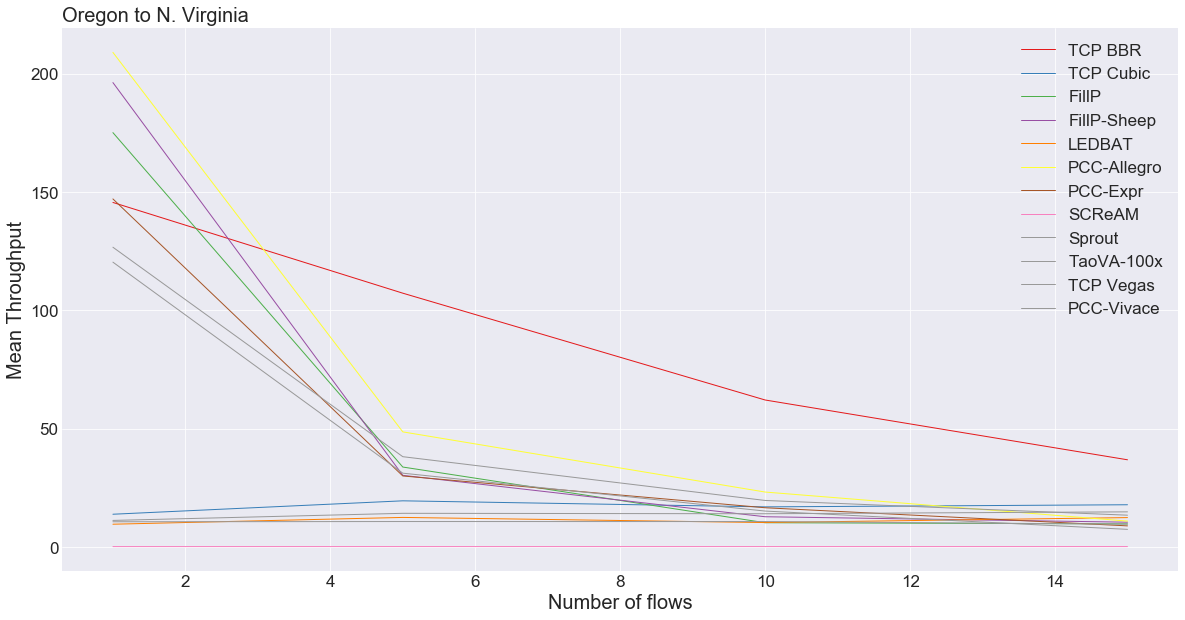

In [74]:
# Plot multiple lines
num_flows = [1,5,10,15]

plt.rcParams["figure.figsize"] = (20,10)
plt.rc('font', size=17)   
for i,cc in enumerate(data.index):
    cols = ['mean_tput_flow'+str(j) for j in num_flows]
    plt.plot(num_flows, data.iloc[i][cols], marker='', color=palette(i), linewidth=1, label=flow1[cc]['name'])

# Add legend
plt.legend()
 
# Add titles
plt.title("Oregon to N. Virginia", loc='left', fontsize=20)
plt.xlabel("Number of flows", fontsize=20)
plt.ylabel("Mean Throughput", fontsize=20)

plt.savefig('Oregen to N. Virginia(Throughput).png')
# Show the graph
plt.show()

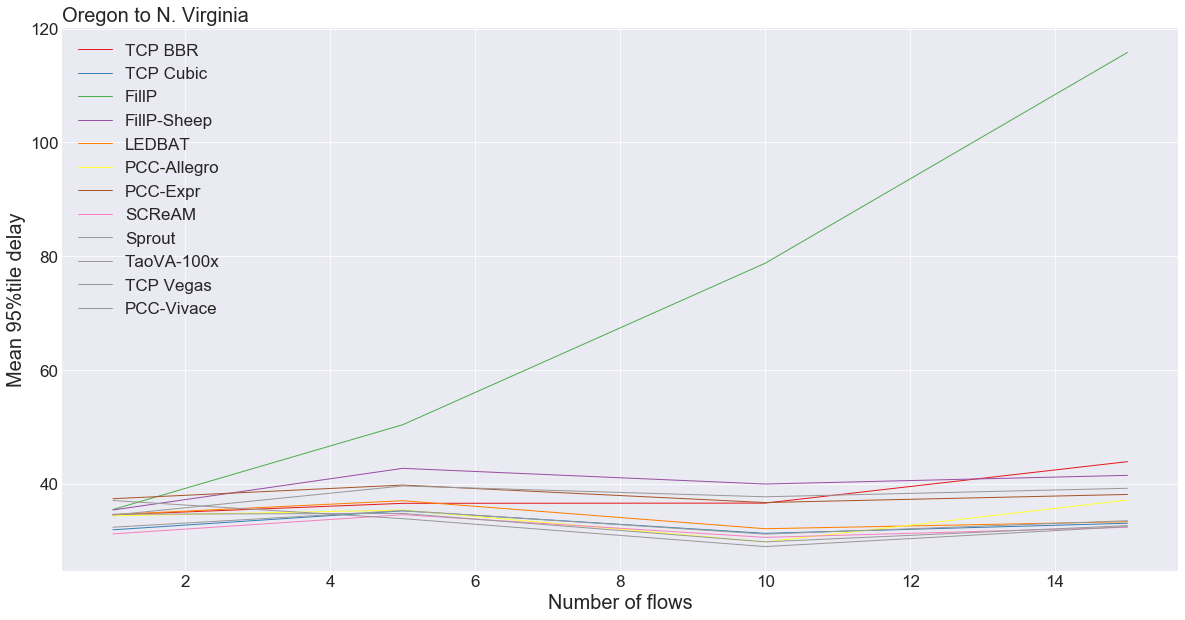

In [75]:
# Plot multiple lines
num_flows = [1,5,10,15]

plt.rcParams["figure.figsize"] = (20,10)
for i,cc in enumerate(data.index):
    cols = ['mean_95%tile_delay_flow'+str(j) for j in num_flows]
    plt.plot(num_flows, data.iloc[i][cols], marker='', color=palette(i), linewidth=1, label=flow1[cc]['name'])

# Add legend
plt.legend()
 
# Add titles
plt.title("Oregon to N. Virginia", loc='left', fontsize=20)
plt.xlabel("Number of flows", fontsize=20)
plt.ylabel("Mean 95%tile delay", fontsize=20)
plt.savefig('Oregen to N. Virginia(Delay).png')
# Show the graph
plt.show()

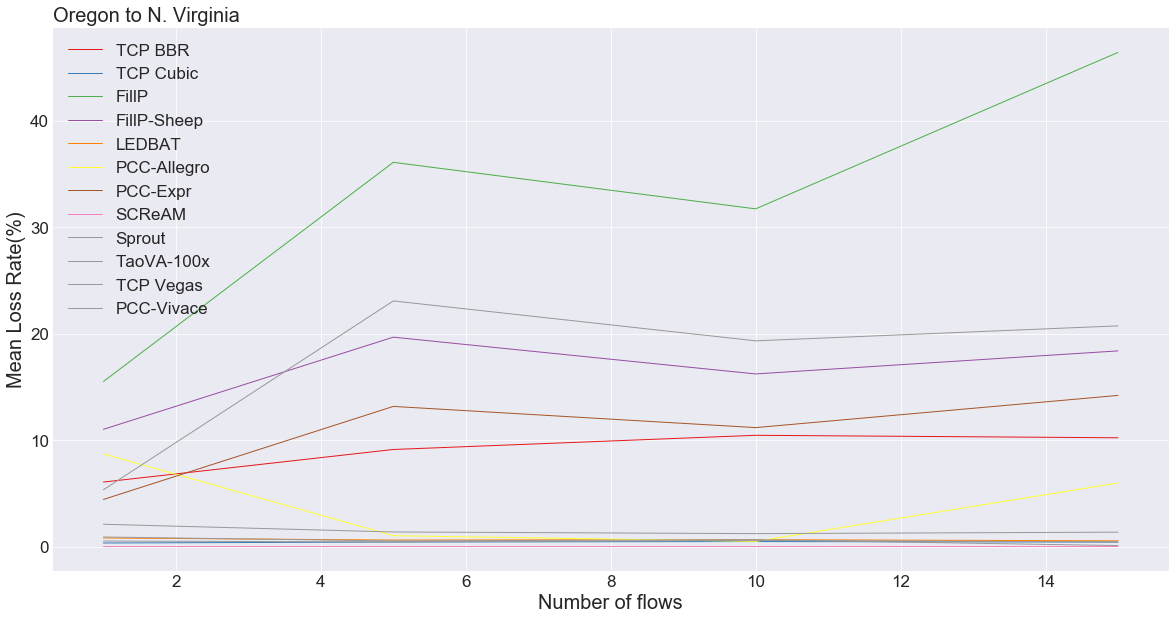

In [76]:
# Plot multiple lines
num_flows = [1,5,10,15]

plt.rcParams["figure.figsize"] = (20,10)
for i,cc in enumerate(data.index):
    cols = ['mean_loss_flow'+str(j) for j in num_flows]
    plt.plot(num_flows, data.iloc[i][cols], marker='', color=palette(i), linewidth=1, label=flow1[cc]['name'])

# Add legend
plt.legend()
 
# Add titles
plt.title("Oregon to N. Virginia", loc='left', fontsize=20)
plt.xlabel("Number of flows", fontsize=20)
plt.ylabel("Mean Loss Rate(%)", fontsize=20)
plt.savefig('Oregen to N. Virginia(Loss).png')
# Show the graph
plt.show()